![supplychain](download.png) 

# Table of Contents

* [1 Loading Data Set](#Loading_Data_Set)
* [2 Data Exploration](#Data_Exploration)
* [3 Data Preprocessing](#Data_Preprocessing)
* [4 Visualization](#Visualization)
* [5 Analysis Questions](#Analysis_Questions)
* [6 Forecasting](#Forecasting) 

## Loading Data Set
<a class="anchor" id="Loading_Data_Set"></a>

In [258]:
import pandas as pd
import numpy as np

data = pd.read_csv('supply_chain_data.csv')


## Data Exploration
<a id="Data_Exploration"></a>

| **Feature**                   | **Description**                                                                                                                                                               |
|-------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Product type**               | The type of product. Options: skincare, haircare, or cosmetics.                                                                                                               |
| **SKU**                        | Unique alphanumeric identifiers for each product.                                                                                                                             |
| **Price**                      | The selling price of each product.                                                                                                                                            |
| **Availability**               | The quantity of each product that is available for sale.                                                                                                                      |
| **Number of products sold**     | The quantity of products sold.                                                                                                                                               |
| **Revenue generated**          | The revenue generated by each product.                                                                                                                                         |
| **Customer demographics**      | Information about customer demographics. Options: Female, Male, Non-binary, or Unknown.                                                                                       |
| **Stock levels**               | Number of units physically present in the store. Availability can be more than stock levels if additional units are on order or in transit.                                   |
| **Lead times/ Business lead time** | The time taken to replenish stock, measured in days. Includes shipping time.                                                                                                |
| **Order quantities**           | The amount of items ordered.                                                                                                                                                  |
| **Shipping times**             | The time required for shipping to the business.                                                                                                                               |
| **Shipping carriers**          | The different carriers used by the business for collections. Options: Carrier A, Carrier B, or Carrier C.                                                                     |
| **Shipping costs**             | The costs of shipping what the business ordered, including packaging, handling, and delivery charges.                                                                          |
| **Supplier name**              | The names of different suppliers.                                                                                                                                             |
| **Location**                   | The locations of the suppliers. Options: Mumbai, Kolkata, Delhi, Bangalore, or Chennai.                                                                                       |
| **Lead time/ Supplier lead time** | The time taken for the supplier to replenish stock, measured in days.                                                                                                        |
| **Production volumes**         | The amount of items produced by each supplier.                                                                                                                                |
| **Manufacturing lead time**    | The time required for manufacturing by each supplier.                                                                                                                         |
| **Manufacturing costs**        | The costs associated with manufacturing.                                                                                                                                      |
| **Inspection results**         | The outcome of product inspections. Options: Pending, Fail, or Pass.                                                                                                          |
| **Defect rates**               | The percentage of defects found in the products.                                                                                                                              |
| **Transportation modes**       | The method used by the supplier to deliver goods to the business. Options: Road, Air, Rail, or Sea.                                                                            |
| **Routes**                     | The route used by the supplier for shipment. Options: Route A, Route B, or Route C.                                                                                           |
| **Costs / transportation cost**| The costs associated with transport, including fuel, vehicle maintenance, driver wages, tolls, and insurance.                                                                  |


In [262]:
data.head(10).style.set_properties(**{'background-color':'#FFBFCA','color':'black','border':'2px solid black'})

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,Carrier C,1.729569,Supplier 5,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,Carrier A,3.890548,Supplier 1,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
5,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,3,Carrier B,4.444099,Supplier 4,Bangalore,10,104,17,56.766476,Fail,2.779194,Road,Route A,235.461237
6,skincare,SKU6,4.078333,48,65,7823.476560,Male,11,15,58,8,Carrier C,3.880763,Supplier 3,Kolkata,14,314,24,1.085069,Pending,1.000911,Sea,Route A,134.369097
7,cosmetics,SKU7,42.958384,59,426,8496.103813,Female,93,17,11,1,Carrier B,2.348339,Supplier 4,Bangalore,22,564,1,99.466109,Fail,0.398177,Road,Route C,802.056312
8,cosmetics,SKU8,68.717597,78,150,7517.363211,Female,5,10,15,7,Carrier C,3.404734,Supplier 4,Mumbai,13,769,8,11.423027,Pending,2.709863,Sea,Route B,505.557134
9,skincare,SKU9,64.015733,35,980,4971.145988,Unknown,14,27,83,1,Carrier A,7.166645,Supplier 2,Chennai,29,963,23,47.957602,Pending,3.844614,Rail,Route B,995.929461


In [264]:
print(f'Shape of the dataset: {data.shape}')

Shape of the dataset: (100, 24)


In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [267]:
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


## Data Preprocessing
<a id="Data_Preprocessing"></a>

In [271]:
# 1. Check for missing values
print("Missing Values in each column:")
missing_values = data.isnull().sum()
print(missing_values)

Missing Values in each column:
Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64


In [273]:
data.duplicated().any()

False

In [275]:
# Step 1: Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Calculate Q1 (25th percentile), Q3 (75th percentile) and IQR for each numerical column
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Flag outliers
outliers = (data[numerical_columns] < lower_bound) | (data[numerical_columns] > upper_bound)

# Step 5: Output rows with any outliers
outliers_data = data[outliers.any(axis=1)]

# Show the result
print("Outliers found in the following rows:")
print(outliers_data)

Outliers found in the following rows:
Empty DataFrame
Columns: [Product type, SKU, Price, Availability, Number of products sold, Revenue generated, Customer demographics, Stock levels, Lead times, Order quantities, Shipping times, Shipping carriers, Shipping costs, Supplier name, Location, Lead time, Production volumes, Manufacturing lead time, Manufacturing costs, Inspection results, Defect rates, Transportation modes, Routes, Costs]
Index: []

[0 rows x 24 columns]


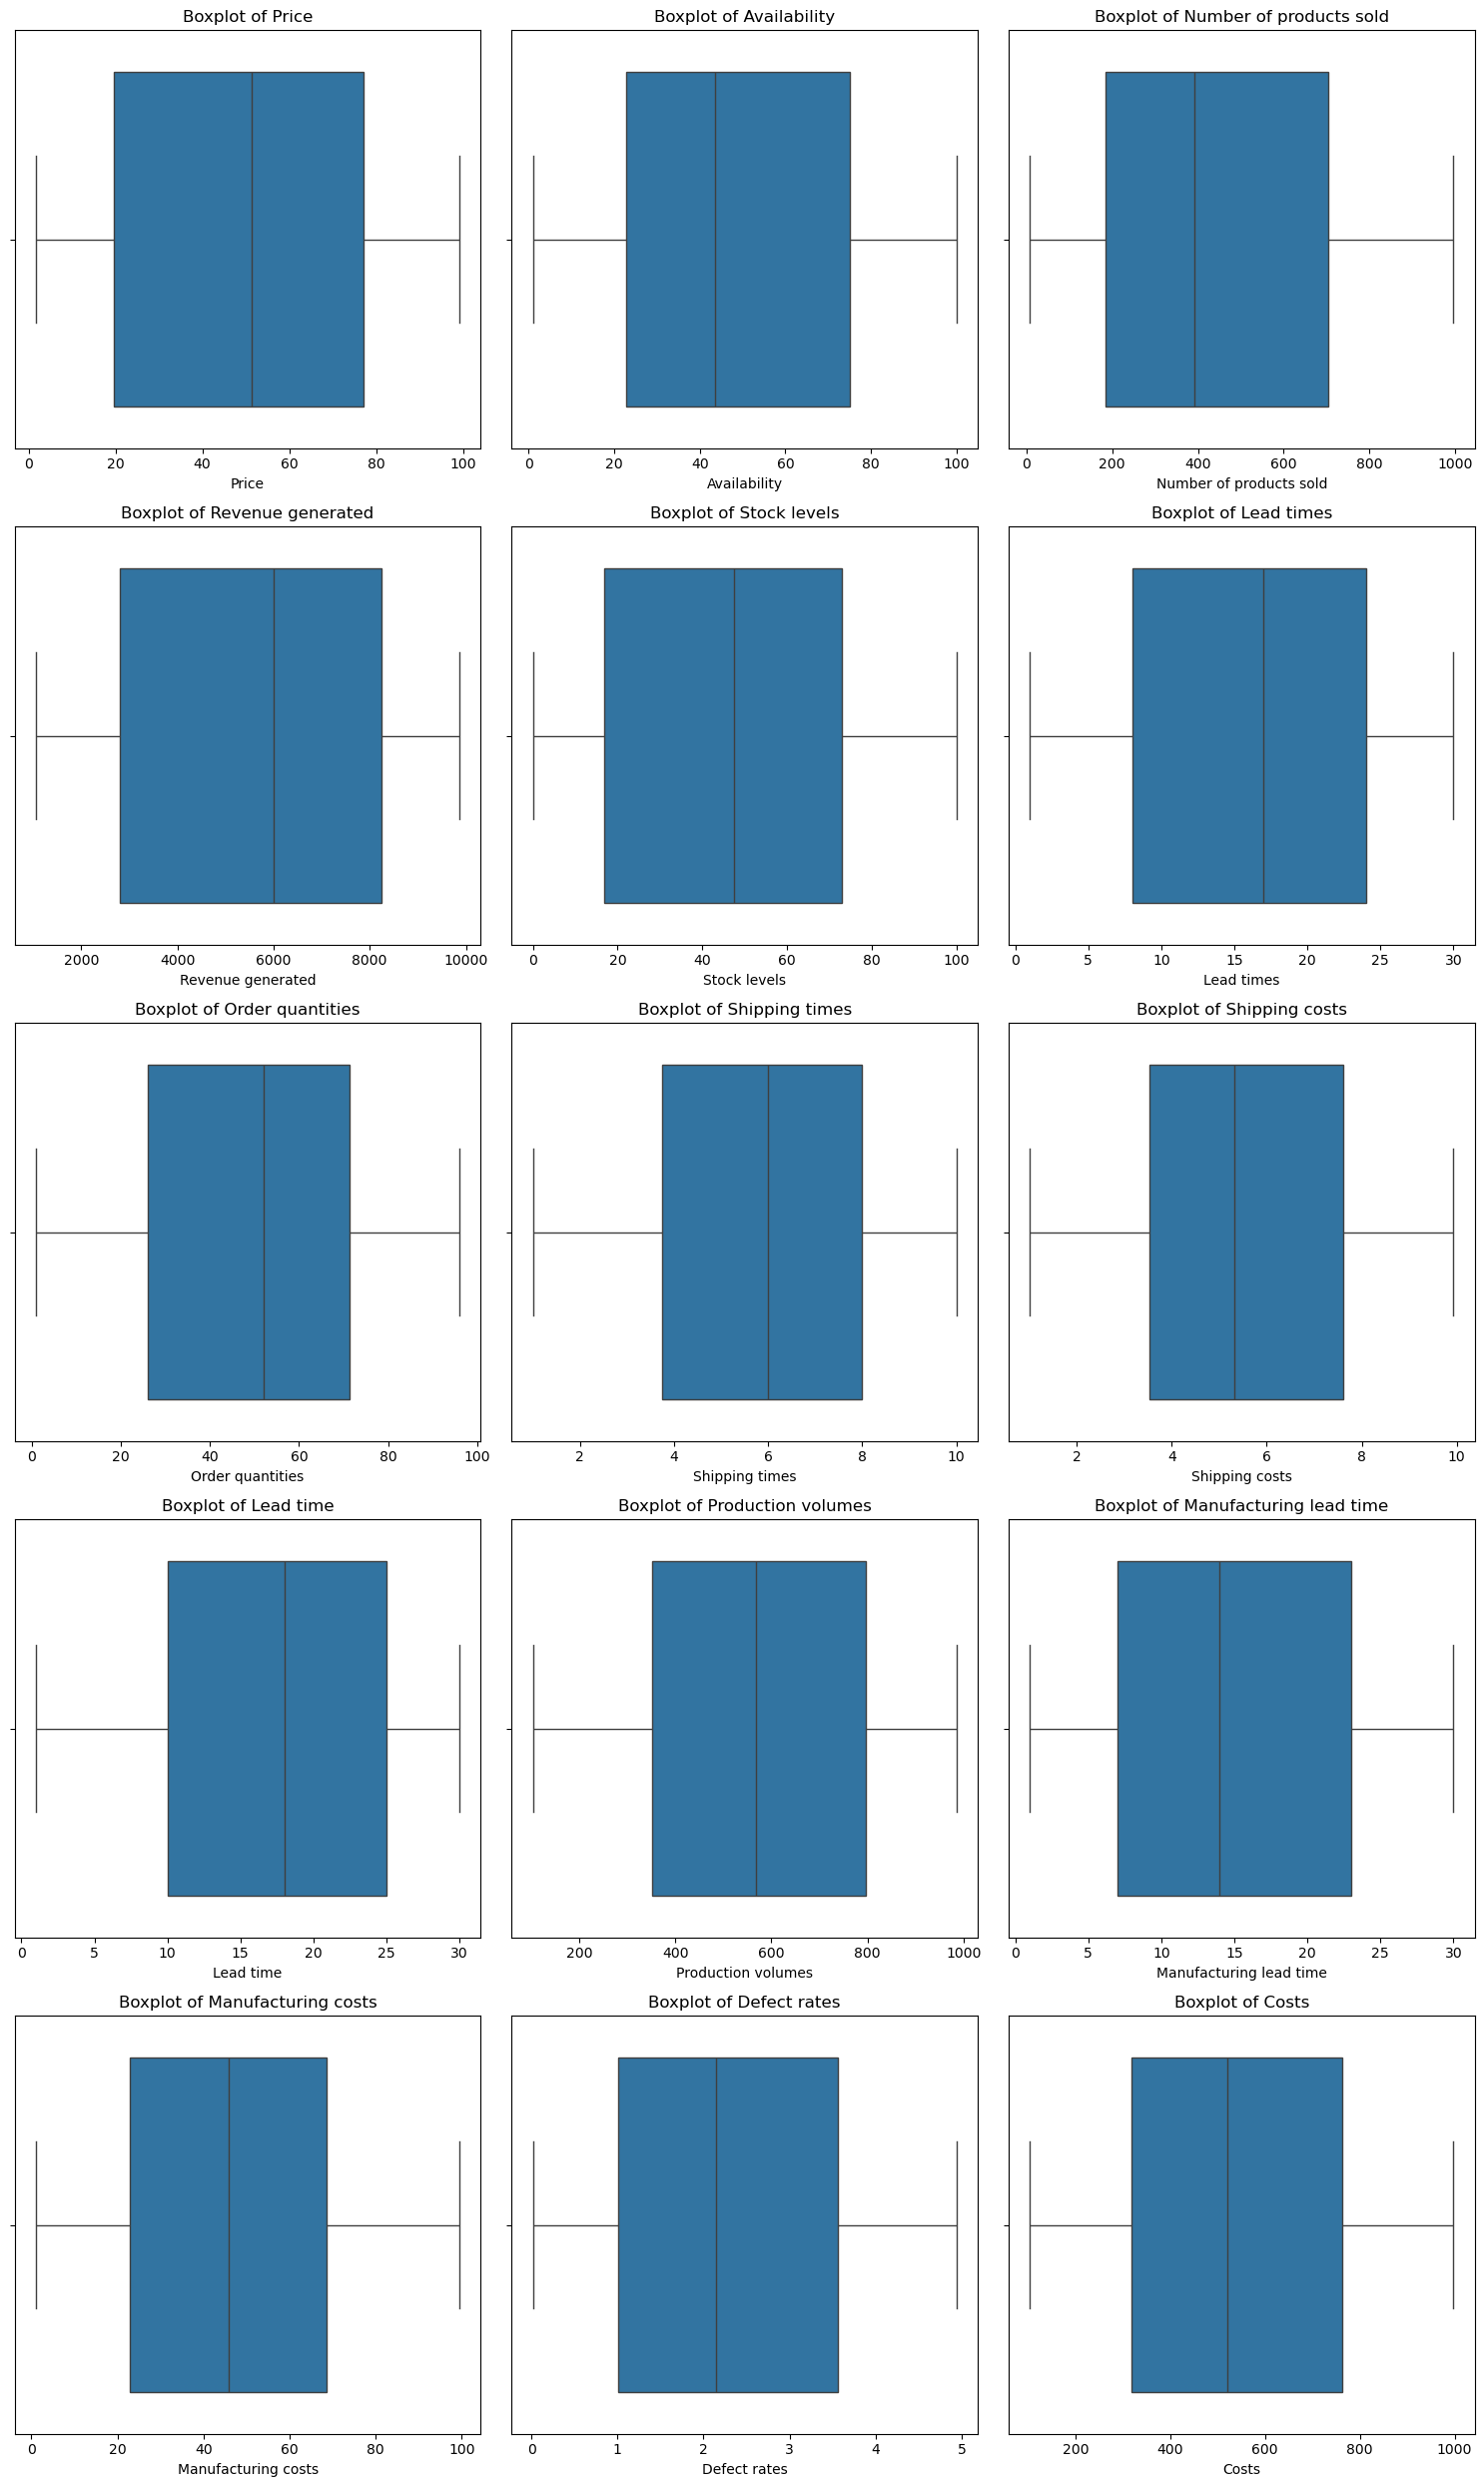

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of subplots needed
num_columns = len(numerical_columns)
ncols = 3  # Number of columns in the subplot grid
nrows = (num_columns + ncols - 1) // ncols  # Calculate number of rows needed

# Create boxplots for each numerical column
plt.figure(figsize=(15, nrows * 5))  # Adjust height based on number of rows
for i, col in enumerate(numerical_columns):
    plt.subplot(nrows, ncols, i + 1)  # Adjust subplot grid
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [279]:
data.columns = data.columns.str.lower().str.replace(' ','_')
data.columns

Index(['product_type', 'sku', 'price', 'availability',
       'number_of_products_sold', 'revenue_generated', 'customer_demographics',
       'stock_levels', 'lead_times', 'order_quantities', 'shipping_times',
       'shipping_carriers', 'shipping_costs', 'supplier_name', 'location',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'inspection_results', 'defect_rates',
       'transportation_modes', 'routes', 'costs'],
      dtype='object')

In [281]:
data = data.rename(columns={'lead_times': 'business_lead_time', 'lead_time':'supplier_lead_time', 'costs': 'transportation_costs'})
data.columns

Index(['product_type', 'sku', 'price', 'availability',
       'number_of_products_sold', 'revenue_generated', 'customer_demographics',
       'stock_levels', 'business_lead_time', 'order_quantities',
       'shipping_times', 'shipping_carriers', 'shipping_costs',
       'supplier_name', 'location', 'supplier_lead_time', 'production_volumes',
       'manufacturing_lead_time', 'manufacturing_costs', 'inspection_results',
       'defect_rates', 'transportation_modes', 'routes',
       'transportation_costs'],
      dtype='object')

## Analysis Questions
<a id="Analysis_Questions"></a>

### Total revenue generated for each product type

In [368]:
total_revenue_per_product_type = data.groupby('product_type')['revenue_generated'].sum()
print("Total revenue generated for each product type:\n")
print(total_revenue_per_product_type)

Total revenue generated for each product type:

product_type
cosmetics    161521.265999
haircare     174455.390605
skincare     241628.162133
Name: revenue_generated, dtype: float64


### Product SKU with the highest revenue

In [366]:
highest_revenue_sku = data.loc[data['revenue_generated'].idxmax(), ['sku', 'product_type', 'revenue_generated']]
print("Product SKU with the highest revenue:\n")
print(highest_revenue_sku)

Product SKU with the highest revenue:

sku                        SKU51
product_type            haircare
revenue_generated    9866.465458
Name: 51, dtype: object


### Average Lead Time per Supplier and Location

In [364]:
avg_lead_time_per_supplier_location = data.groupby(['supplier_name', 'location'])['supplier_lead_time'].mean()

# Display the result
print("Average Lead Time per Supplier and Location:\n")
print(avg_lead_time_per_supplier_location)

Average Lead Time per Supplier and Location:

supplier_name  location 
Supplier 1     Bangalore    16.000000
               Chennai      16.250000
               Delhi         6.500000
               Kolkata      19.375000
               Mumbai       12.166667
Supplier 2     Bangalore    16.600000
               Chennai      27.666667
               Delhi        18.833333
               Kolkata      25.333333
               Mumbai       10.600000
Supplier 3     Bangalore    10.333333
               Chennai      19.250000
               Delhi        23.000000
               Kolkata      22.666667
               Mumbai       26.666667
Supplier 4     Bangalore    16.000000
               Chennai      18.000000
               Delhi         3.000000
               Kolkata      15.666667
               Mumbai       17.500000
Supplier 5     Bangalore    22.333333
               Chennai      15.200000
               Delhi        28.000000
               Kolkata      18.600000
               Mu

### Transportation Mode with the Highest Associated Cost

In [329]:
# Calculate the total transportation costs for each transportation mode
total_cost_per_transport_mode = data.groupby('transportation_modes')['transportation_costs'].sum()

# Find the transportation mode with the highest total cost
highest_cost_transport_mode = total_cost_per_transport_mode.idxmax()

# Display the results
print("Total cost per transportation mode:\n")
print(total_cost_per_transport_mode)
print(f"Transportation mode with the highest cost: {highest_cost_transport_mode}")


Total cost per transportation mode:

transportation_modes
Air     14604.527498
Rail    15168.931559
Road    16048.193639
Sea      7102.925520
Name: transportation_costs, dtype: float64
Transportation mode with the highest cost: Road


### Supplier with the Highest Defect Rates and Their Manufacturing Lead Times

In [362]:
# Find the supplier with the highest defect rates and their manufacturing lead times
supplier_with_highest_defect = data.loc[data['defect_rates'].idxmax(), ['supplier_name', 'defect_rates', 'manufacturing_lead_time']]

# Display the result
print("the supplier with the highest defect rates and their manufacturing lead times:\n")
print(supplier_with_highest_defect)


the supplier with the highest defect rates and their manufacturing lead times:

supplier_name              Supplier 5
defect_rates                 4.939255
manufacturing_lead_time             7
Name: 42, dtype: object


### Total Production Volumes by Supplier and Location

In [360]:
# Calculate total production volumes by supplier and location
total_production_per_supplier_location = data.groupby(['supplier_name', 'location'])['production_volumes'].sum()

# Display the result
print("total_production_per_supplier_location:\n")
print(total_production_per_supplier_location)


total_production_per_supplier_location:

supplier_name  location 
Supplier 1     Bangalore    2349
               Chennai      1973
               Delhi        1740
               Kolkata      4021
               Mumbai       3462
Supplier 2     Bangalore    2236
               Chennai      2678
               Delhi        4225
               Kolkata      1527
               Mumbai       3439
Supplier 3     Bangalore    1549
               Chennai      2056
               Delhi        1094
               Kolkata      1918
               Mumbai       1380
Supplier 4     Bangalore     668
               Chennai      2854
               Delhi        1126
               Kolkata      4425
               Mumbai       2683
Supplier 5     Bangalore    1025
               Chennai      2423
               Delhi         177
               Kolkata      3560
               Mumbai       2196
Name: production_volumes, dtype: int64


### Shipping Times for Each Carrier and the Fastest Carrier

In [344]:
# Calculate the average shipping times for each carrier
avg_shipping_time_per_carrier = data.groupby('shipping_carriers')['shipping_times'].mean()

# Find the carrier with the fastest average shipping time
fastest_shipping_carrier = avg_shipping_time_per_carrier.idxmin()

# Display the results
print("Average shipping time per carrier:\n")
print(avg_shipping_time_per_carrier)
print(f"Fastest shipping carrier: {fastest_shipping_carrier}")


Average shipping time per carrier:

shipping_carriers
Carrier A    6.142857
Carrier B    5.302326
Carrier C    6.034483
Name: shipping_times, dtype: float64
Fastest shipping carrier: Carrier B


### Route with the Highest Transportation Costs

In [350]:
# Calculate the total transportation costs for each route
total_cost_per_route = data.groupby('routes')['transportation_costs'].sum()

# Find the route with the highest transportation cost
highest_cost_route = total_cost_per_route.idxmax()

# Display the results
print("Total cost per route:\n")
print(total_cost_per_route)
print(f"Route with the highest transportation cost: {highest_cost_route}")


Total cost per route:

routes
Route A    20875.774494
Route B    22039.384026
Route C    10009.419696
Name: transportation_costs, dtype: float64
Route with the highest transportation cost: Route B


### Relationship Between Stock Levels and Number of Products Sold

In [353]:
# Calculate the correlation between stock levels and number of products sold
stock_vs_sales_correlation = data['stock_levels'].corr(data['number_of_products_sold'])

# Display the result
print(f"Correlation between stock levels and number of products sold: {stock_vs_sales_correlation}")


Correlation between stock levels and number of products sold: 0.022189481359586975


### Average Manufacturing Cost per Product Type

In [358]:
# Calculate the average manufacturing cost per product type
avg_manufacturing_cost_per_product_type = data.groupby('product_type')['manufacturing_costs'].mean()

# Display the result
print("avg_manufacturing_cost_per_product_type:\n")
print(avg_manufacturing_cost_per_product_type)


avg_manufacturing_cost_per_product_type:

product_type
cosmetics    43.052740
haircare     48.457993
skincare     48.993157
Name: manufacturing_costs, dtype: float64


## Visualization
<a id="Visualization"></a>

C:\Users\STORM\AppData\Local\Temp\ipykernel_9268\3668861183.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sku', y='revenue_generated', data=best_selling, palette='viridis')


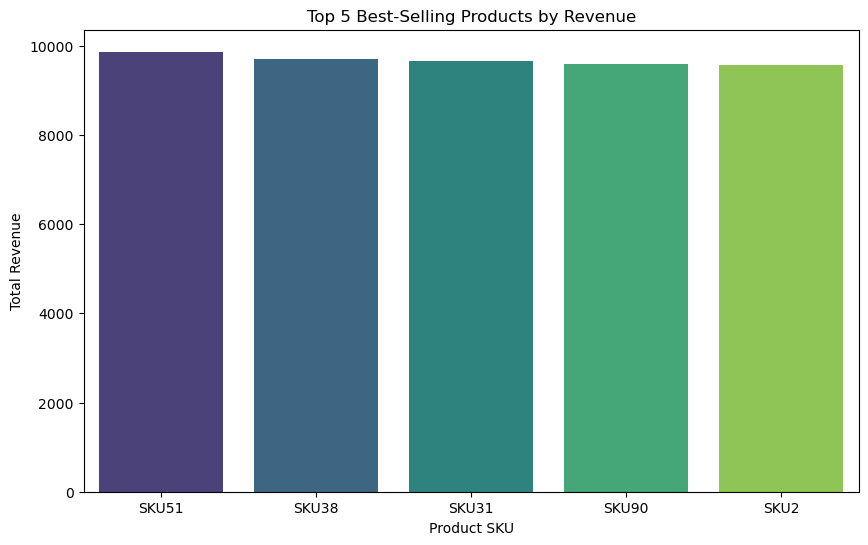

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns
best_selling = data.groupby('sku')['revenue_generated'].sum().reset_index().sort_values(by='revenue_generated', ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='sku', y='revenue_generated', data=best_selling, palette='viridis')
plt.title('Top 5 Best-Selling Products by Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Product SKU')
plt.show()

C:\Users\STORM\AppData\Local\Temp\ipykernel_9268\833242848.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='supplier_name', y='defect_rates', data=defect_rates, palette='magma')


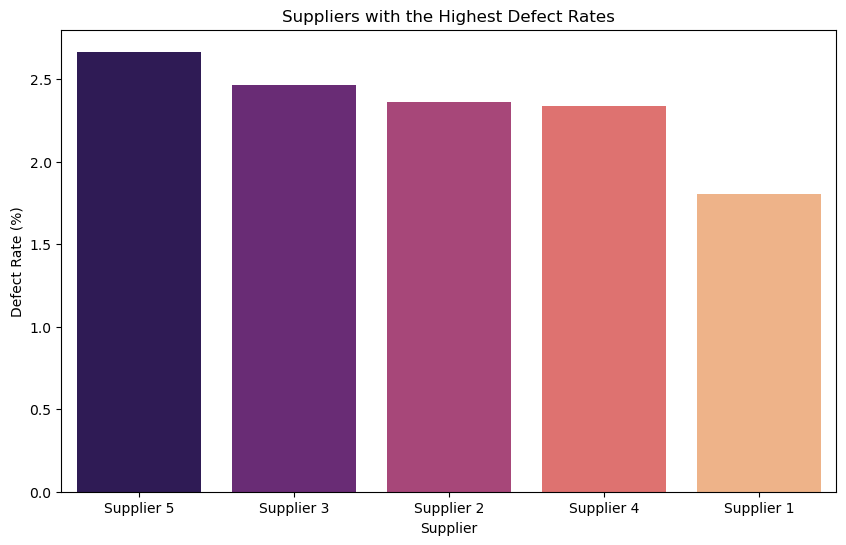

In [248]:
# Group by supplier and calculate average defect rates
defect_rates = data.groupby('supplier_name')['defect_rates'].mean().reset_index().sort_values(by='defect_rates', ascending=False).head(5)
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='supplier_name', y='defect_rates', data=defect_rates, palette='magma')
plt.title('Suppliers with the Highest Defect Rates')
plt.ylabel('Defect Rate (%)')
plt.xlabel('Supplier')
plt.show()

C:\Users\STORM\AppData\Local\Temp\ipykernel_9268\195855962.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='transportation_modes', y='transportation_costs', data=transportation_costs, palette='Set3')


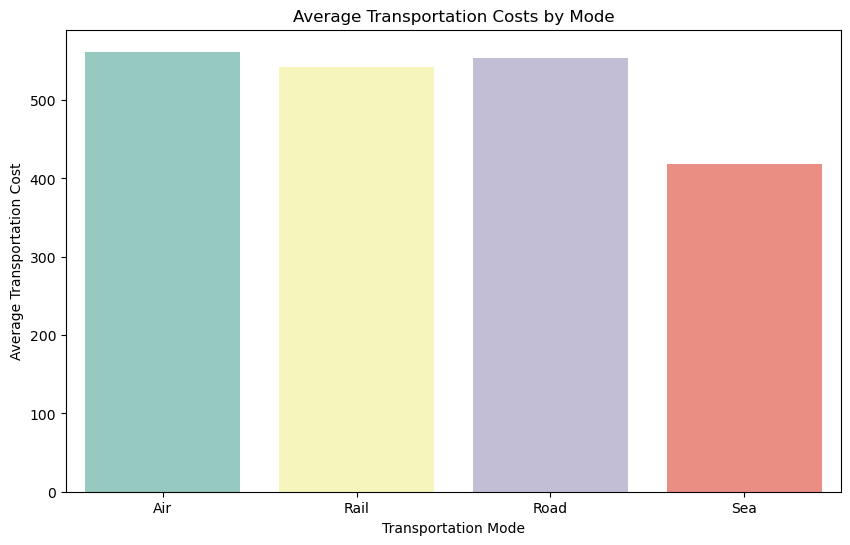

In [250]:
# Group by transportation mode and calculate average transportation cost
transportation_costs = data.groupby('transportation_modes')['transportation_costs'].mean().reset_index()
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='transportation_modes', y='transportation_costs', data=transportation_costs, palette='Set3')
plt.title('Average Transportation Costs by Mode')
plt.ylabel('Average Transportation Cost')
plt.xlabel('Transportation Mode')
plt.show()

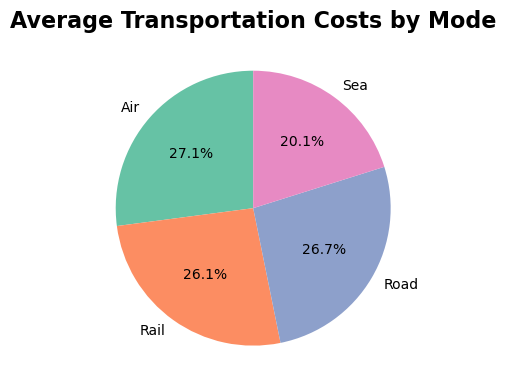

In [204]:
# Group by Transportation Mode and calculate the average transportation cost
avg_transport_costs = data.groupby('transportation_modes')['transportation_costs'].mean().reset_index()

# Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(avg_transport_costs['transportation_costs'], labels=avg_transport_costs['transportation_modes'], 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(avg_transport_costs)))

# Ensure pie is drawn as a circle
plt.title('Average Transportation Costs by Mode', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

C:\Users\STORM\AppData\Local\Temp\ipykernel_9268\3822175976.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_demographics', y='revenue_generated', data=customer_revenue, palette='husl')


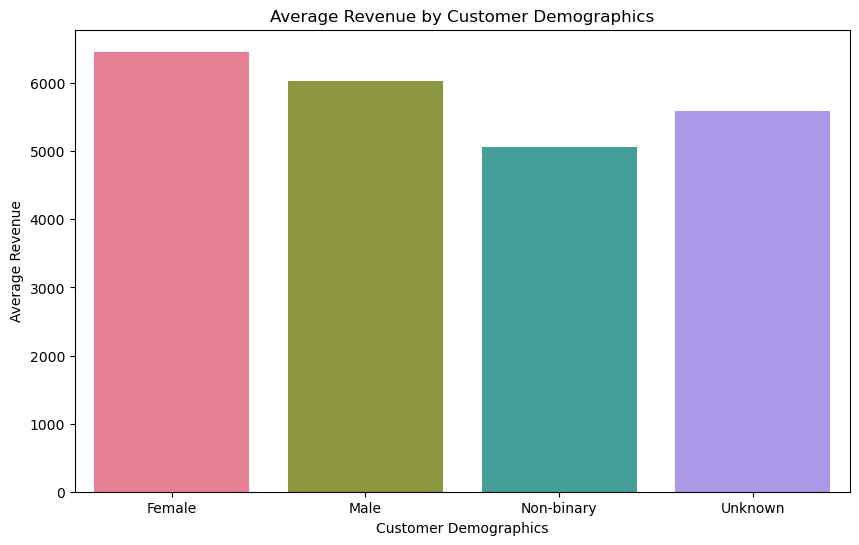

In [167]:
# Group by customer demographics and calculate average revenue
customer_revenue = data.groupby('customer_demographics')['revenue_generated'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_demographics', y='revenue_generated', data=customer_revenue, palette='husl')
plt.title('Average Revenue by Customer Demographics')
plt.ylabel('Average Revenue')
plt.xlabel('Customer Demographics')
plt.show()

C:\Users\STORM\AppData\Local\Temp\ipykernel_9268\2196699143.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='routes', y='transportation_costs', data=route_costs, palette='YlOrBr')


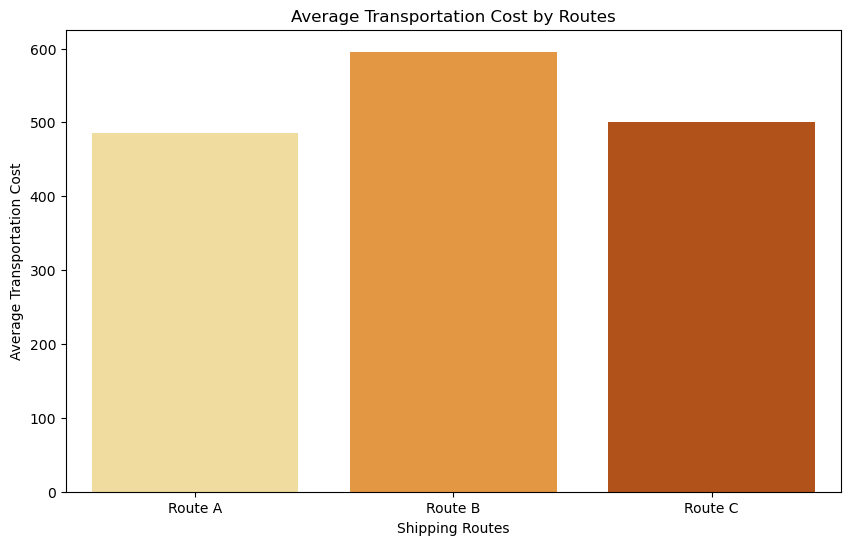

In [171]:
# Group by route and calculate average cost
route_costs = data.groupby('routes')['transportation_costs'].mean().reset_index()
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='routes', y='transportation_costs', data=route_costs, palette='YlOrBr')
plt.title('Average Transportation Cost by Routes')
plt.ylabel('Average Transportation Cost')
plt.xlabel('Shipping Routes')
plt.show()

C:\Users\STORM\AppData\Local\Temp\ipykernel_9268\250031278.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='shipping_carriers', y='shipping_costs', data=shipping_costs, palette='PuRd')


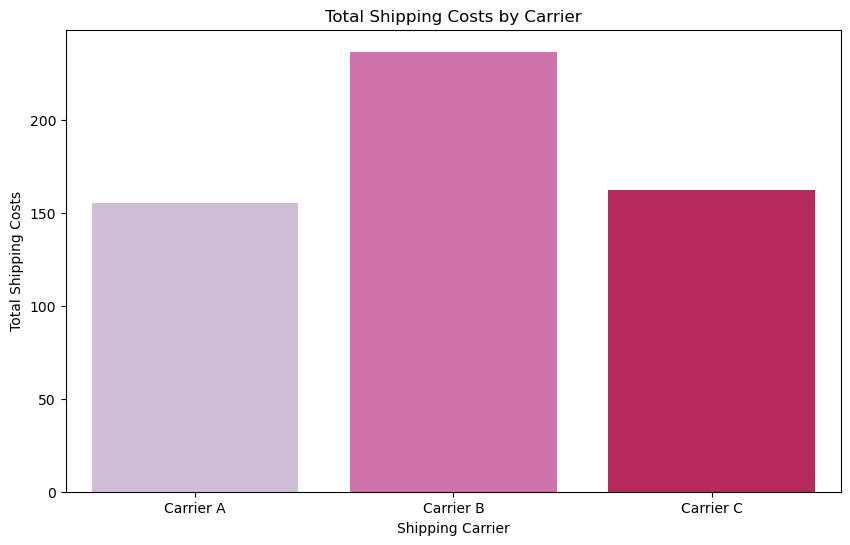

In [177]:
# Group by shipping carrier and sum the shipping costs
shipping_costs = data.groupby('shipping_carriers')['shipping_costs'].sum().reset_index()
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='shipping_carriers', y='shipping_costs', data=shipping_costs, palette='PuRd')
plt.title('Total Shipping Costs by Carrier')
plt.ylabel('Total Shipping Costs')
plt.xlabel('Shipping Carrier')
plt.show()

C:\Users\STORM\AppData\Local\Temp\ipykernel_9268\833242848.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='supplier_name', y='defect_rates', data=defect_rates, palette='magma')


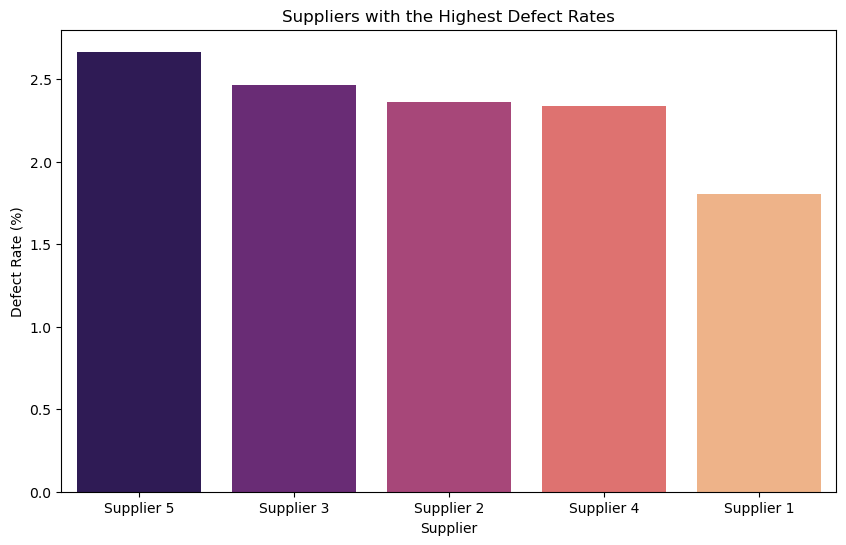

In [188]:
# Group by supplier and calculate average defect rates
defect_rates = data.groupby('supplier_name')['defect_rates'].mean().reset_index().sort_values(by='defect_rates', ascending=False).head(5)
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='supplier_name', y='defect_rates', data=defect_rates, palette='magma')
plt.title('Suppliers with the Highest Defect Rates')
plt.ylabel('Defect Rate (%)')
plt.xlabel('Supplier')
plt.show()

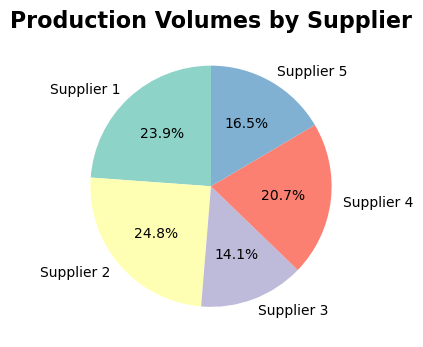

In [208]:
# Group by Supplier and calculate the sum of production volumes
prod_volumes = data.groupby('supplier_name')['production_volumes'].sum().reset_index()

# Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(prod_volumes['production_volumes'], labels=prod_volumes['supplier_name'], 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(prod_volumes)))

# Ensure pie is drawn as a circle
plt.title('Production Volumes by Supplier', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

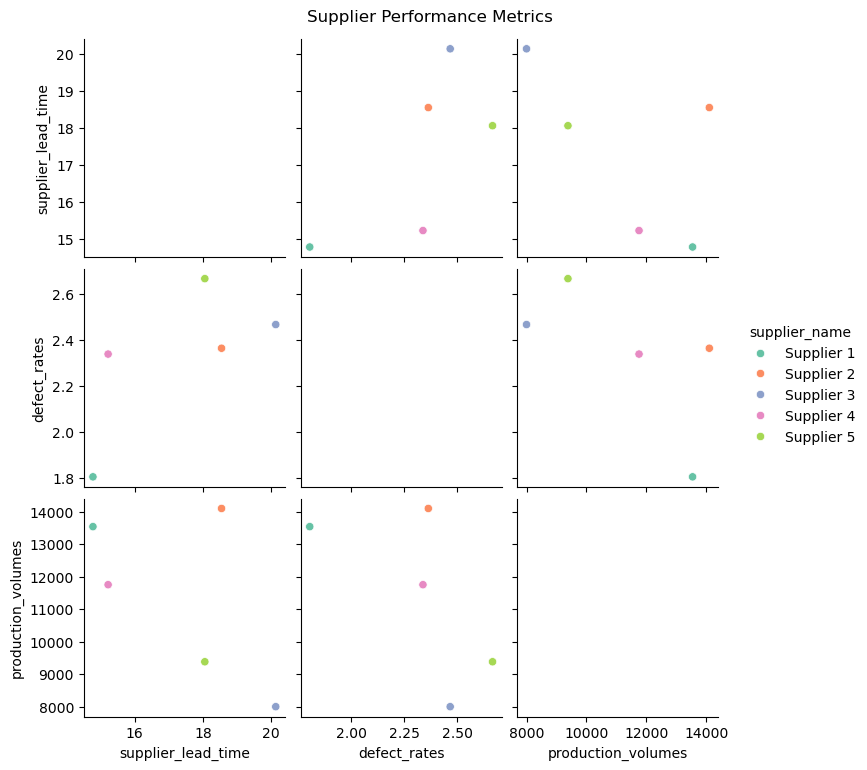

In [183]:
# Group by supplier and calculate performance metrics
supplier_performance = data.groupby('supplier_name').agg({'supplier_lead_time': 'mean',
                                                          'defect_rates': 'mean',
                                                          'production_volumes': 'sum'}).reset_index()

# Plot a pairplot to visualize relationships
sns.pairplot(supplier_performance, hue='supplier_name', palette='Set2')
plt.suptitle('Supplier Performance Metrics', y=1.02)
plt.show()

C:\Users\STORM\AppData\Local\Temp\ipykernel_9268\2840786767.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_type', y='revenue_generated', data=product_type_perf, palette='Paired')


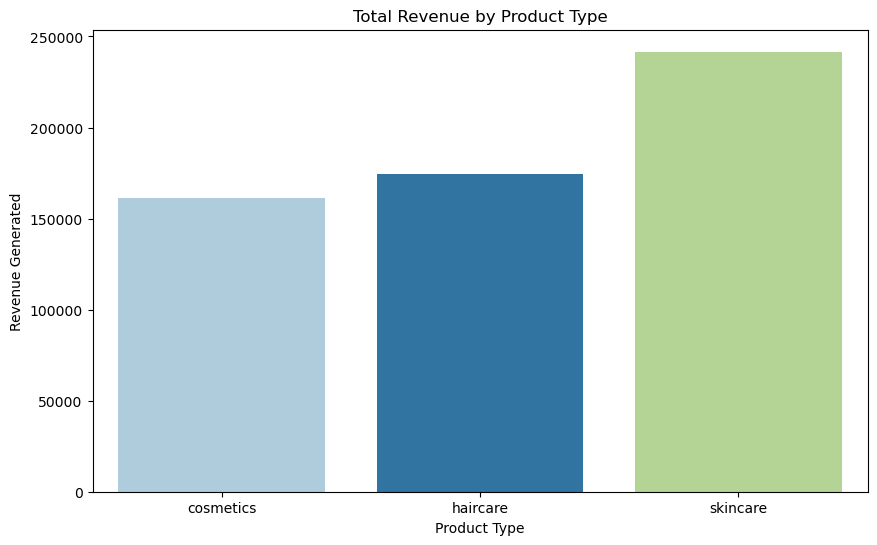

C:\Users\STORM\AppData\Local\Temp\ipykernel_9268\2840786767.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_type', y='number_of_products_sold', data=product_type_perf, palette='coolwarm')


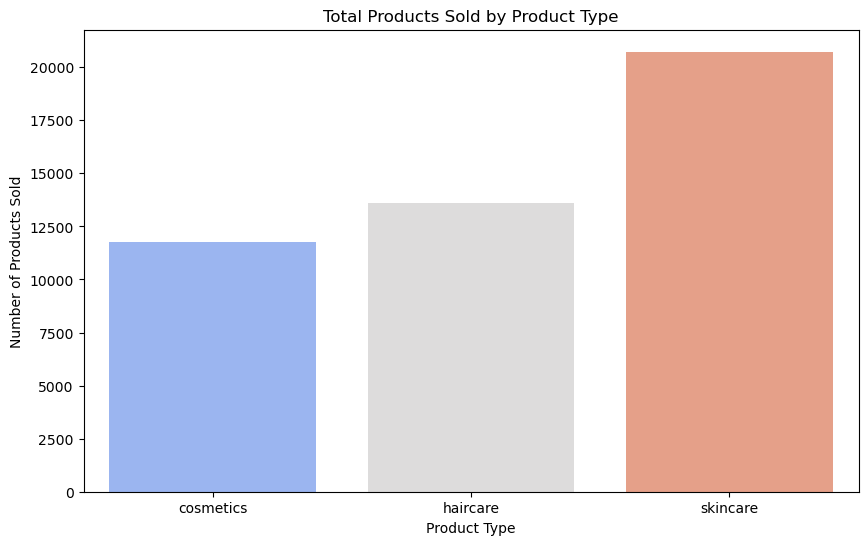

In [185]:
# Group by product type and calculate total sales and revenue
product_type_perf = data.groupby('product_type').agg({'number_of_products_sold': 'sum',
                                                      'revenue_generated': 'sum'}).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='product_type', y='revenue_generated', data=product_type_perf, palette='Paired')
plt.title('Total Revenue by Product Type')
plt.ylabel('Revenue Generated')
plt.xlabel('Product Type')
plt.show()

# For sales volume:
plt.figure(figsize=(10, 6))
sns.barplot(x='product_type', y='number_of_products_sold', data=product_type_perf, palette='coolwarm')
plt.title('Total Products Sold by Product Type')
plt.ylabel('Number of Products Sold')
plt.xlabel('Product Type')
plt.show()

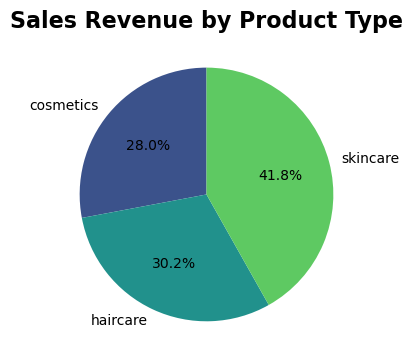

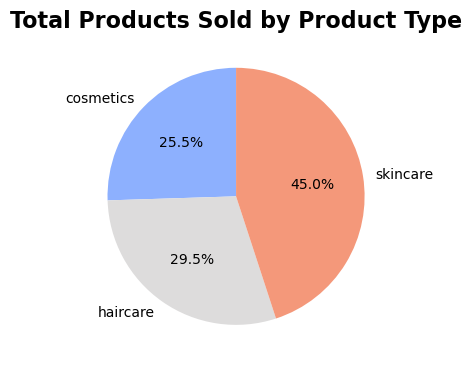

In [200]:
# Group by product type and calculate total sales and revenue
product_type_perf = data.groupby('product_type').agg({'number_of_products_sold': 'sum',
                                                      'revenue_generated': 'sum'}).reset_index()

# Pie chart plot
plt.figure(figsize=(4, 4))
plt.pie(revenue_by_product_type['revenue_generated'], labels=revenue_by_product_type['product_type'], 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(revenue_by_product_type)))

# Equal aspect ratio ensures the pie chart is drawn as a circle
plt.title('Sales Revenue by Product Type', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(products_sold_by_type['number_of_products_sold'], labels=products_sold_by_type['product_type'], 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', len(products_sold_by_type)))

# Ensure pie is drawn as a circle
plt.title('Total Products Sold by Product Type', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Forecasting
<a id="Forecasting"></a>

In [ ]:
file_path = 'cleaned_data.xlsx'

# Assuming the dataset is in one sheet
data = pd.read_excel(file_path)

Mean Squared Error: 1186.28
Model Accuracy: -5.81%
Mean Squared Error: 1186.2810169630038
R-Squared: -0.05808360712387506


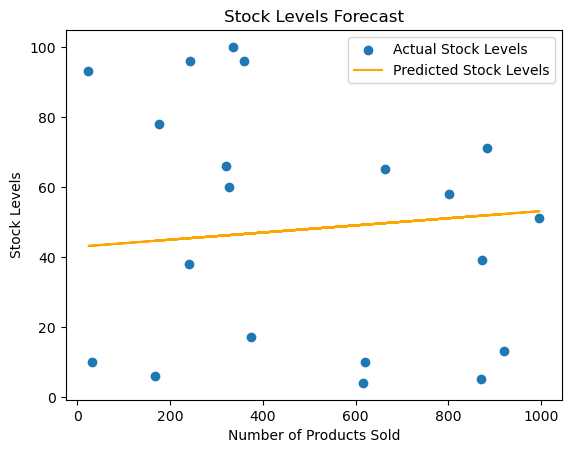

In [224]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming 'Stock levels' and 'Number of products sold' columns exist
X = data[['number_of_products_sold']].values  # Features (e.g., number of products sold)
y = data['stock_levels'].values  # Target (stock levels)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict stock levels
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Convert R-squared to percentage
accuracy_percentage = r2 * 100

print(f"Mean Squared Error: {mse:.2f}")
print(f"Model Accuracy: {accuracy_percentage:.2f}%")

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")
# Plot the actual vs predicted stock levels
plt.scatter(X_test, y_test, label='Actual Stock Levels')
plt.plot(X_test, y_pred, color='orange', label='Predicted Stock Levels')
plt.title('Stock Levels Forecast')
plt.xlabel('Number of Products Sold')
plt.ylabel('Stock Levels')
plt.legend()
plt.show()


Mean Squared Error: 1314.47431
R-Squared: -0.17242348103749672


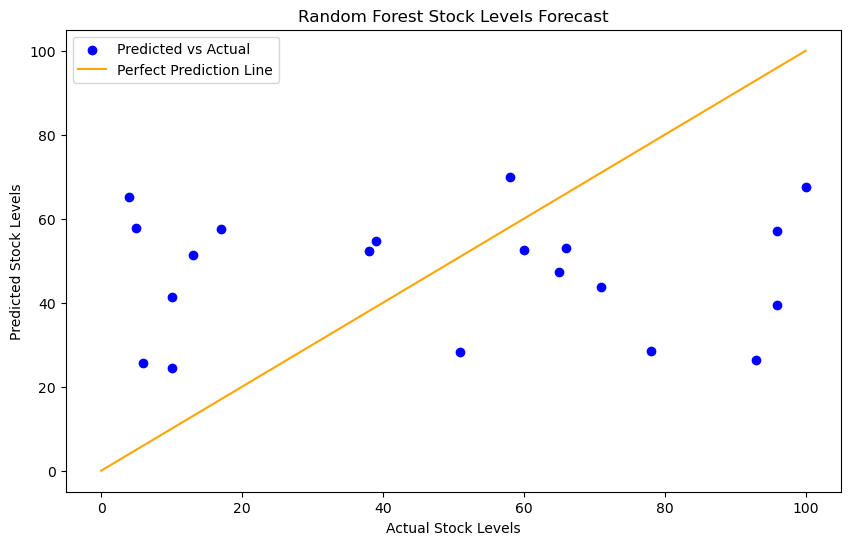

In [212]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset (ensure the correct path or variable)
# data = pd.read_csv('your_dataset.csv')  # Uncomment and modify if needed

# Feature and target variable
X = data[['number_of_products_sold', 'price', 'availability']]  # Include additional features here
y = data['stock_levels']

# Split data into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict stock levels for test data
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

# Plot the actual vs predicted stock levels for test data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='orange', label='Perfect Prediction Line')
plt.title('Random Forest Stock Levels Forecast')
plt.xlabel('Actual Stock Levels')
plt.ylabel('Predicted Stock Levels')
plt.legend()
plt.show()


Mean Squared Error: 85022.91
Model Accuracy: -30.45%


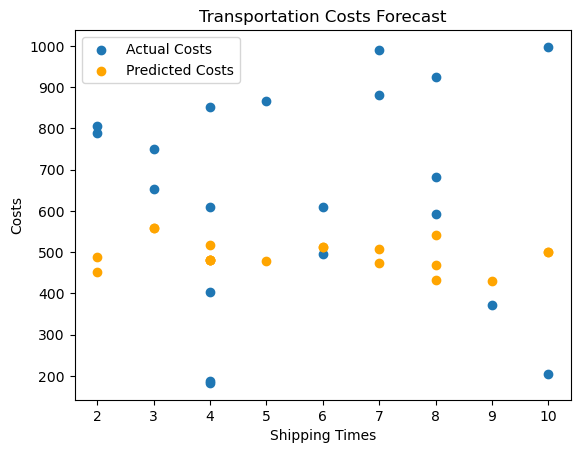

In [222]:
# Assuming relevant columns: 'Transportation modes', 'Shipping times', 'Transportation cost'
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables like Transportation modes
label_encoder = LabelEncoder()
data['Transportation modes_encoded'] = label_encoder.fit_transform(data['transportation_modes'])

# Prepare features and target
X = data[['shipping_times', 'Transportation modes_encoded']].values  # Features
y = data['transportation_costs'].values  # Target (transportation costs)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict transportation costs
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Convert R-squared to percentage
accuracy_percentage = r2 * 100

print(f"Mean Squared Error: {mse:.2f}")
print(f"Model Accuracy: {accuracy_percentage:.2f}%")
# Plot actual vs predicted costs
plt.scatter(X_test[:, 0], y_test, label='Actual Costs')
plt.scatter(X_test[:, 0], y_pred, color='orange', label='Predicted Costs')
plt.title('Transportation Costs Forecast')
plt.xlabel('Shipping Times')
plt.ylabel('Costs')
plt.legend()
plt.show()


In [71]:
data.to_excel('cleaned_data.xlsx', index=False)